In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Quick Question

**Numpy** is a python library used for working with arrays.

It also has functions for working in domain of linear algebra, fourier transform, and matrices.

In Python we have lists that serve the purpose of arrays, but they are slow to process.

NumPy aims to provide an array object that is up to 50x faster than traditional Python lists.

The array object in NumPy is called ndarray, it provides a lot of supporting functions that make working with ndarray very easy.

**matplotlib.pyplot** is a collection of functions that make matplotlib work like MATLAB.
Each pyplot function makes some change to a figure, e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

In [2]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

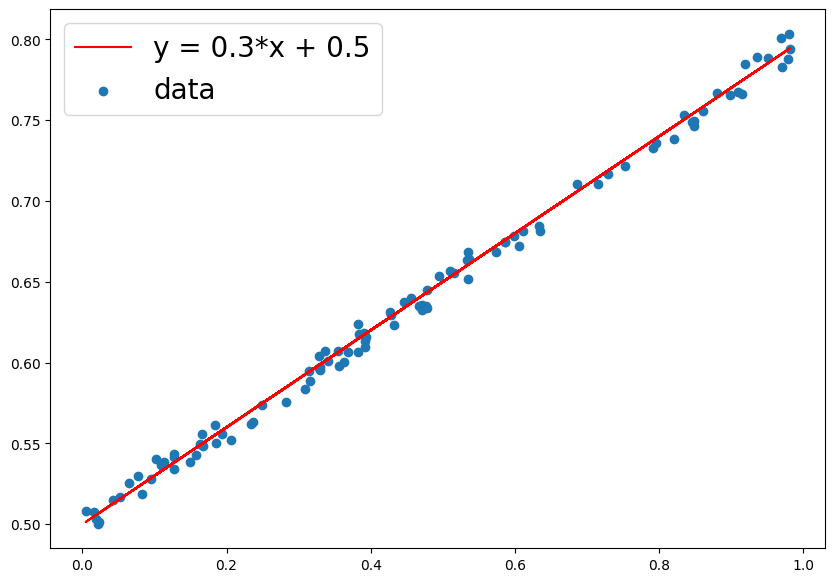

w: 0.3, b: 0.5


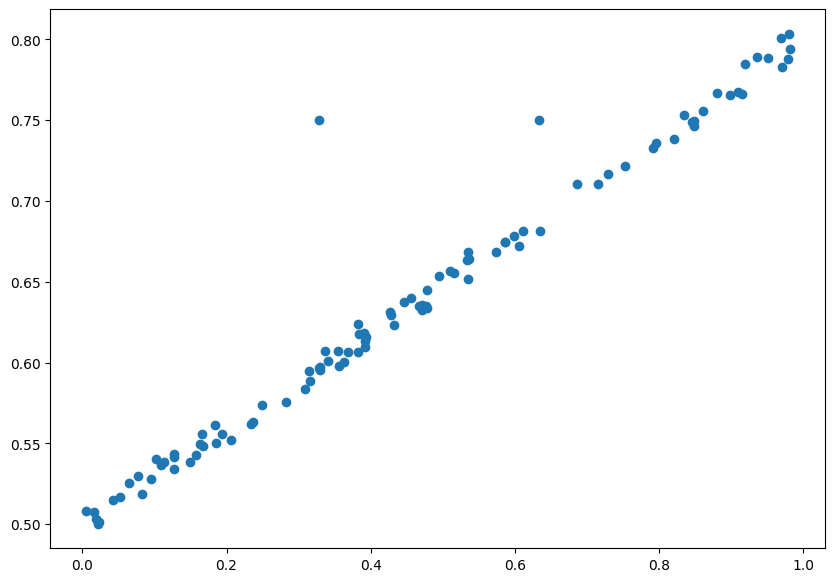

In [3]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

In [4]:
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

In [5]:
y_hat = w * x + b

error = (y_hat - y) ** 2

## Quick Question

**MSE Loss**

In the first case, it is difficult to consider that learning has been successful when the error becomes 0. And when absolute value ​​is used, learning can be difficult because differentiation is difficult in the backpropagation process.

If I have to choose between the two, it seems wise to choose the latter considering the learning potential.

In [6]:
# Epoch (# of iterations)
num_epoch = 5000

# Learning rate
learning_rate = 0.5

## Quick Question

**Epoch**, in machine learning, refers to the one entire passing of training data through the algorithm.
It's a hyperparameter that determines the process of training the machine learning model.

**Learning rate** is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.[1] Since it influences to what extent newly acquired information overrides old information, it metaphorically represents the speed at which a machine learning model "learns".

# Question 1

In [7]:
errors = [] # 오차를 저장할 리스트 생성

w = np.random.uniform(low=-1.0, high=1.0) # -1과 1 사이에서 임의의 가중치 w
b = np.random.uniform(low=-1.0, high=1.0) # -1과 1 사이에서 임의의 편향 b

for epoch in range(num_epoch): # epoch의 수 만큼 for문을 반복
    y_hat = x * w + b # 입력값 x를 넣어서 예측값 y_hat을 계산

    error = ((y_hat - y)**2).mean() # 오차는 제곱오차(MSE)를 사용
    if error < 0.0005: # 오차가 0.0005 미만이면 학습을 조기 종료
        break

    w = w - learning_rate * ((y_hat - y) * x).mean() # Loss를 가중치 w에 대해 편미분한 값을 학습률에 곱해서 업데이트
    b = b - learning_rate * (y_hat - y).mean() # Loss를 편향 b에 대해 편미분한 값을 학습률에 곱해서 업데이트

    errors.append(error) # 이전에 생성한 오차리스트에 오차 값을 저장

    if epoch % 5 == 0: # epoch이 5의 배수일때, epoch, weight, bias, error를 출력
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15) # 경계선
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error)) # 학습이 모두 완료되었을때의 epoch, weight, bias, error를 출력

 0 w = 0.10808, b = 0.43740 error = 0.15984
 5 w = 0.18885, b = 0.55313 error = 0.00135
10 w = 0.20631, b = 0.54608 error = 0.00103
15 w = 0.22058, b = 0.53918 error = 0.00082
20 w = 0.23263, b = 0.53334 error = 0.00067
25 w = 0.24280, b = 0.52842 error = 0.00056
------------------------------------------------------------
30 w = 0.2, b = 0.5 error = 0.00049


## Let's practice numpy

In [8]:
import numpy as np

In [9]:
arr = np.array([1,2,3])
print(arr)

[1 2 3]


In [10]:
arr2 = np.array([[1,2,3], [4,5,6]])
print(arr2)

[[1 2 3]
 [4 5 6]]


In [11]:
arr3 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(arr3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [12]:
print(type(arr))
print(type(arr2))
print(type(arr3))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
print(arr.shape)
print(arr2.shape)
print(arr3.shape)

(3,)
(2, 3)
(3, 3)


In [14]:
print(np.ones((2,3)))
print(2*np.ones((2,3)))

[[1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]]


In [15]:
print(np.zeros((2,3)))
print(0*np.ones((2,3)))

[[0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [16]:
arr12 = np.ones((3,4))
arr12.reshape(1, 12)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [17]:
arr12.reshape(-1, 12)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [18]:
arr12.reshape(-1, 5)

ValueError: cannot reshape array of size 12 into shape (5)

In [19]:
arr_mixed = np.array([1,5,2,3])
print(np.sort(arr_mixed))

[1 2 3 5]


## Question 2

In [20]:
arr_mixed = np.array([1,5,2,3])
print(np.sort(arr_mixed)[::-1])

[5 3 2 1]


Perform an indirect sort along the given axis using the algorithm specified by the kind keyword. It returns an array of indices of the same shape as a that index data along the given axis in sorted order.

In [21]:
arr_mixed = np.array([[1,5],[2,3]])
np.argsort(arr_mixed,axis=0)

array([[0, 1],
       [1, 0]])

In [22]:
arr_mixed = np.array([[1,5],[2,3]], dtype=[('x', '<i4'), ('y', '<i4')])
arr_mixed


array([[(1, 1), (5, 5)],
       [(2, 2), (3, 3)]], dtype=[('x', '<i4'), ('y', '<i4')])

In [23]:
np.argsort(arr_mixed, order=('y','x'))

array([[0, 1],
       [0, 1]])



---



In [24]:
arr4 = np.array([5,2,3,4,6])
print(arr4[1])

2


In [25]:
arr4[1:3]

array([2, 3])

# Quick Question

In [26]:
arr4[:4]

array([5, 2, 3, 4])

# 3. Let's practice matplotlib

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

[1, 2, 3]


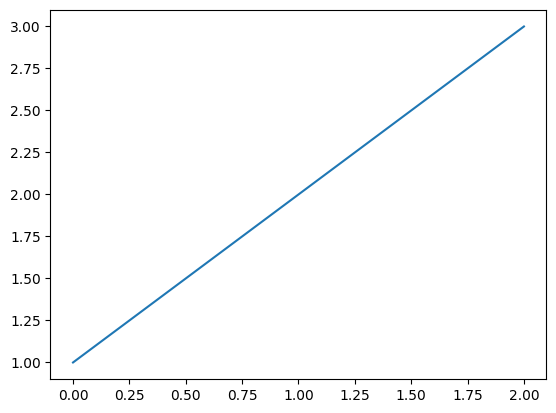

In [28]:
x = [1, 2 , 3]
print(x)
plt.plot(x)

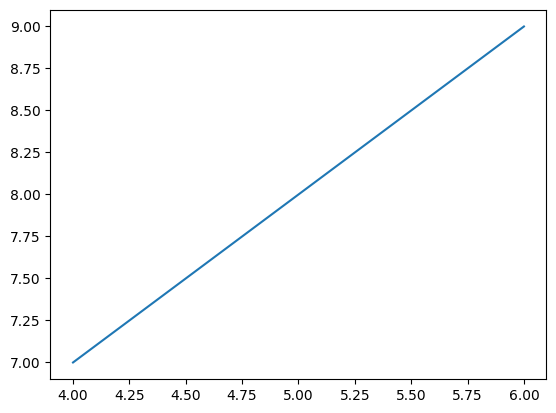

In [29]:
x = [4, 5, 6]
y = [7, 8, 9]
plt.plot(x, y)

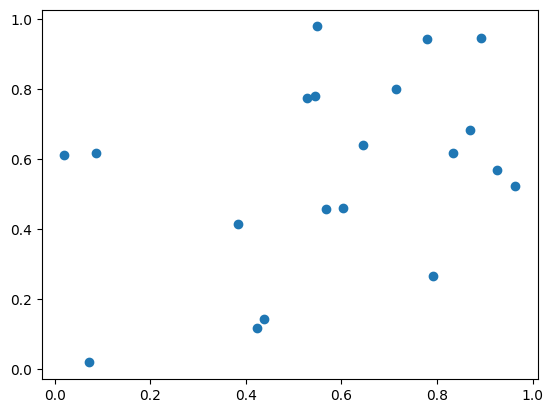

In [38]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y)
plt.show()

<ipython-input-39-87c4f5698552>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.5, cmap='Spectral')


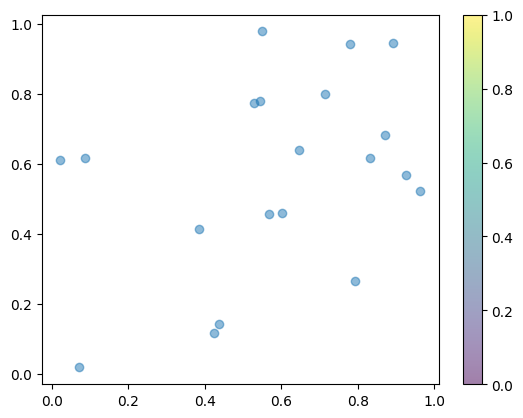

In [39]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

## Question 3

(1) Alpha는 점들의 투명도를 나타내고, cmap은 우측에 있는 컬러맵 종류를 지정합니다.

<ipython-input-40-9c01b6dd60b7>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,alpha=0.1, cmap='Spectral')


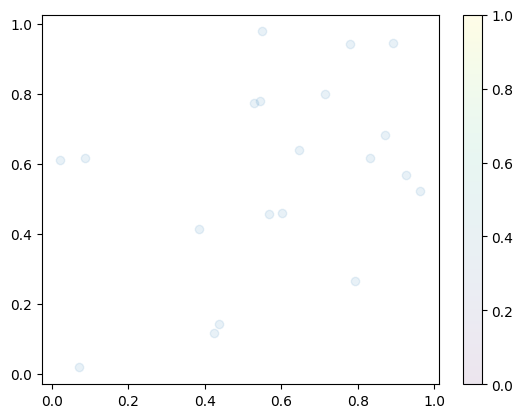

In [40]:
# (2)
plt.scatter(x,y,alpha=0.1, cmap='Spectral')
plt.colorbar()
plt.show()

<ipython-input-41-c625083d1936>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.5, cmap='viridis')


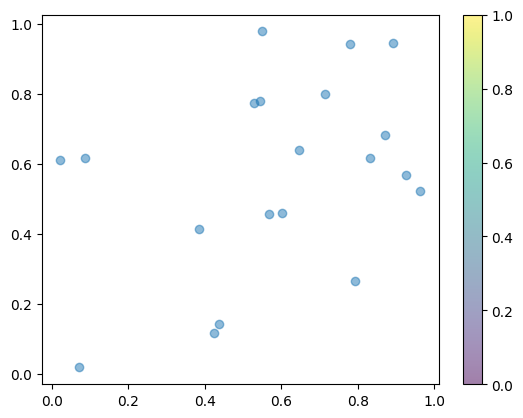

In [41]:
# (3)
plt.scatter(x, y, alpha=0.5, cmap='viridis')
plt.colorbar()
plt.show()